# Pymaceuticals Inc.
---

### Analysis

    - 1.The bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen reveals that the Capomulin and Ramicane regimens have the highest number of observations, indicating that these two treatments were more commonly administered to the mice in the study.

    2.The box plot displaying the distribution of tumor volume for each treatment group shows that the Capomulin and Ramicane regimens have lower median tumor volumes compared to Infubinol and Ceftamin. This suggests that Capomulin and Ramicane may be more effective in reducing tumor size.
    
    3.The scatter plot of mouse weight versus the average observed tumor volume for the entire Capomulin regimen shows a positive correlation between mouse weight and tumor volume. This implies that heavier mice tend to have larger tumor volumes. The linear regression line fitted to the scatter plot indicates a positive slope, further supporting the positive relationship between mouse weight and tumor volume.
 

In [1]:
# Dependencies and Setup

import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt

# Study data files
mouse_metadata = Path("data/Mouse_metadata.csv")
study_results = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single DataFrame

merge_data= pd.merge(study_results, mouse_metadata,how='left',on=['Mouse ID','Mouse ID'])
merged_data = merge_data.dropna()


# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_entries = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice = merged_data[duplicate_entries]['Mouse ID'].unique()
print("Array(",duplicate_mice, "dtype=", duplicate_mice.dtype, ")")


Array( ['g989'] dtype= object )


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_entries = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice = merged_data[duplicate_entries]['Mouse ID'].unique()
duplicate_data = merged_data.loc[merged_data['Mouse ID'].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset='Mouse ID', keep='first')
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
valid_data = clean_data.dropna()
num_mice_valid = valid_data['Mouse ID'].nunique()

num_mice_valid

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_data = merged_data.groupby('Drug Regimen')
mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
variance = grouped_data['Tumor Volume (mm3)'].var()
std_deviation = grouped_data['Tumor Volume (mm3)'].std()
sem = grouped_data['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_deviation,
    'Tumor Volume Std. Err.': sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
advanced_summary_df = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
advanced_summary_df.columns = ['Mean', 'Median', 'Var', 'STD', 'SEM']

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_df

,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

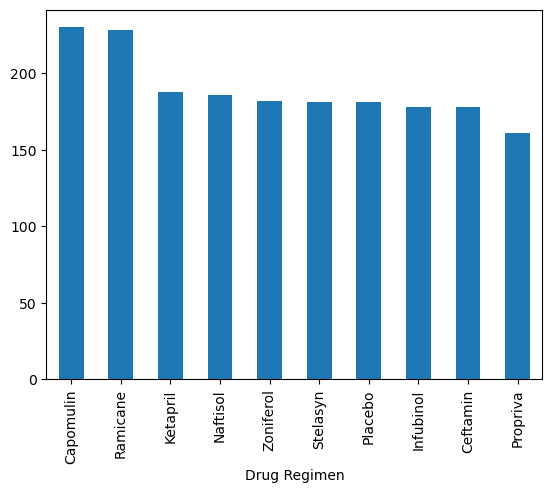

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_df = merged_data['Drug Regimen'].value_counts()

count_df.plot(kind='bar', rot=90)
title=''
xlabel='Drug Regimen'
ylabel='Number of Rows'


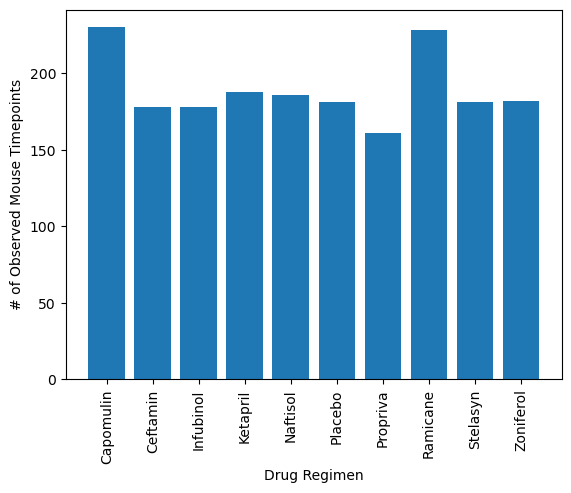

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_df = merged_data.groupby('Drug Regimen').size()

plt.bar(count_df.index, count_df.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

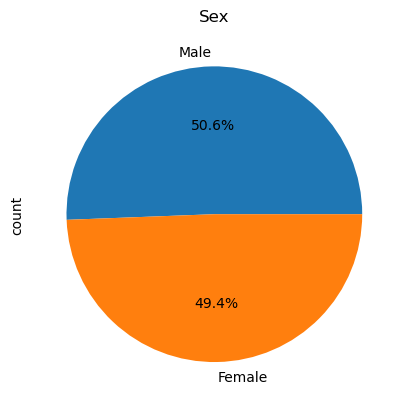

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts_df = merged_data['Sex'].value_counts()
gender_counts_df.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sex')
plt.show()


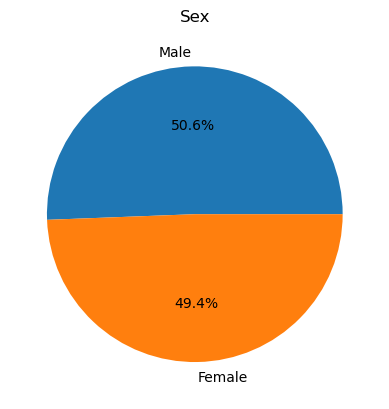

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = merged_data['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
filtered_data = merged_data[(merged_data['Drug Regimen'] == 'Capomulin') | 
                            (merged_data['Drug Regimen'] == 'Ramicane') | 
                            (merged_data['Drug Regimen'] == 'Infubinol') | 
                            (merged_data['Drug Regimen'] == 'Ceftamin')]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume = pd.merge(last_timepoint, merged_data, on=['Mouse ID', 'Timepoint'])[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume.head()



,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

potential_outliers = {}
for treatment in treatments:
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(tumor_volumes)
    
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers:")
    print(outliers)
    print()
    

Capomulin's potential outliers:
1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers:
1814    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



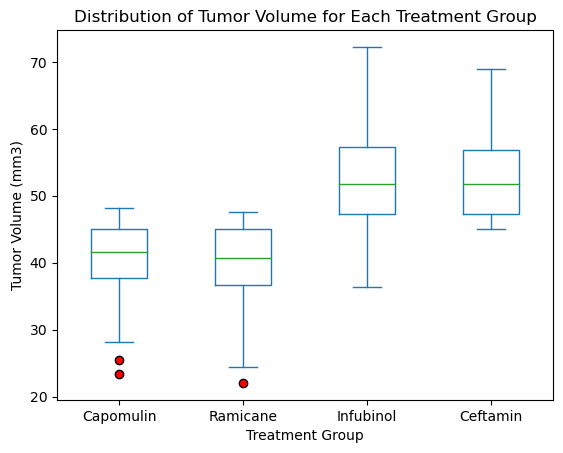

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_vol_data = []

for treatment in treatments:
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

boxplot_data = pd.DataFrame(tumor_vol_data, index=treatments).T

flierprops = {'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6, 'linestyle': 'none'}
boxplot_data.plot(kind='box', vert=True, flierprops=flierprops)

plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()



## Line and Scatter Plots

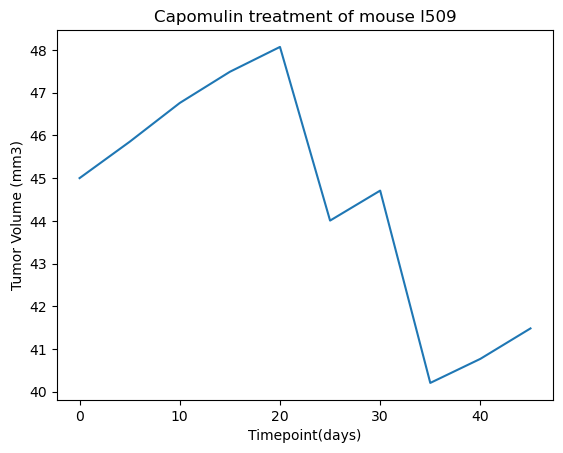

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'l509' 

if (merged_data['Mouse ID'] == mouse_id).any() and (merged_data['Drug Regimen'] == 'Capomulin').any():
    mouse_data = merged_data.loc[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == mouse_id)]
    plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

    plt.xlabel('Timepoint(days)')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(f'Capomulin treatment of mouse {mouse_id}')

    plt.show()
else:
    print(f"No data available for Mouse ID {mouse_id} with Capomulin treatment.")


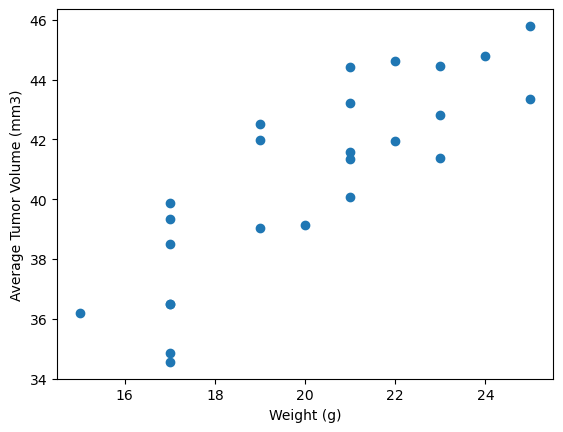

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

scatter_data = pd.merge(mouse_metadata, average_tumor_volume, on='Mouse ID')

plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is:  0.84


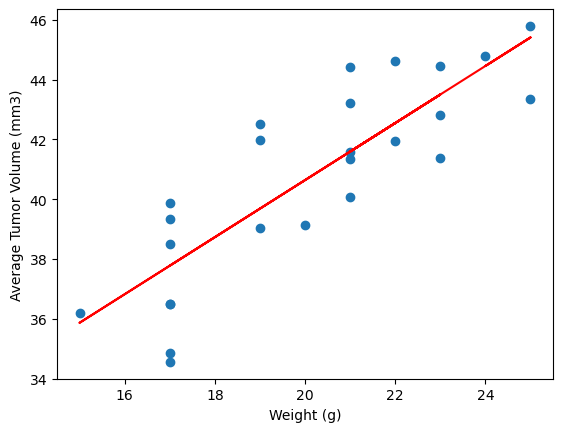

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st

capomulin_data = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

scatter_data = pd.merge(mouse_metadata, average_tumor_volume, on='Mouse ID')

correlation_coefficient, _ = st.pearsonr(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient: .2f}")

slope, intercept, r_value, p_value, std_err = st.linregress(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])

plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])

plt.plot(scatter_data['Weight (g)'], intercept + slope * scatter_data['Weight (g)'], color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
